In [1]:
#title: Hopfield-network-and-asociated-memory
#date: 2020-07-07

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#digits:: the fundametal memory
zero = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 0, 1, 1, 0, 0, 1, 1, 0, 0],[0, 1, 1, 0, 0, 0, 0, 1, 1, 0],[0, 1, 1, 0, 0, 0, 0, 1, 1, 0],[0, 1, 1, 1, 0, 0, 1, 1, 1, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
one = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0]]
two = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 1, 1, 0, 0, 0, 1, 1, 1, 0],[0, 1, 1, 0, 0, 0, 0, 1, 1, 0],[0, 0, 0, 0, 0, 0, 0, 1, 1, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 1, 1, 1, 1, 1, 1, 1, 1, 1],[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
three = [[0, 1, 1, 1, 1, 1, 1, 1, 1, 0],[0, 1, 1, 1, 1, 1, 1, 1, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 0, 0, 0, 0],[0, 0, 0, 1, 1, 1, 0, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 1, 1, 0],[0, 0, 0, 0, 0, 0, 0, 1, 1, 1],[0, 0, 1, 0, 0, 0, 1, 1, 1, 0],[0, 1, 1, 1, 1, 1, 1, 1, 0, 0],[0, 0, 1, 1, 1, 1, 1, 0, 0, 0]]
four = [[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 1, 1, 0, 1, 1, 0, 0, 0],[0, 1, 1, 0, 0, 1, 1, 0, 0, 0],[1, 1, 0, 0, 0, 1, 1, 0, 0, 0],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],[0, 0, 0, 0, 0, 1, 1, 0, 0, 0]]
five = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0],[1, 1, 1, 1, 1, 1, 1, 1, 1, 0],[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],[1, 1, 1, 1, 1, 1, 1, 1, 0, 0],[0, 1, 1, 1, 1, 1, 1, 1, 1, 0],[0, 0, 0, 0, 0, 0, 0, 1, 1, 1],[0, 1, 1, 0, 0, 0, 0, 1, 1, 0],[0, 1, 1, 1, 1, 1, 1, 1, 0, 0],[0, 0, 1, 1, 1, 1, 1, 0, 0, 0]]
six = [[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 1, 1, 0, 0, 0, 1, 1, 0, 0],[0, 1, 1, 0, 0, 0, 1, 1, 0, 0],[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],[1, 1, 1, 1, 1, 1, 1, 1, 0, 0],[0, 1, 1, 1, 1, 1, 1, 1, 1, 0],[0, 1, 1, 0, 0, 0, 1, 1, 1, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 0, 0, 1, 1, 1, 1, 0, 0, 0]]
seven = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 1, 1, 1, 1, 1, 1, 1, 1, 0],[0, 1, 1, 1, 1, 1, 1, 1, 1, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0]]
eight = [[0, 0, 0, 0, 1, 1, 0, 0, 0, 0],[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 1, 1, 0, 0, 0, 1, 1, 0, 0],[0, 1, 1, 0, 0, 0, 0, 1, 1, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 1, 1, 0, 0, 0, 0, 1, 1, 0],[0, 1, 1, 1, 0, 0, 1, 1, 1, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 0, 0, 0, 1, 1, 0, 0, 0, 0]]
nine = [[0, 0, 0, 1, 1, 1, 0, 0, 0, 0],[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 1, 1, 0, 0, 1, 1, 0, 0],[0, 0, 1, 1, 0, 0, 1, 1, 0, 0],[0, 1, 1, 0, 0, 0, 0, 1, 1, 0],[0, 1, 1, 1, 0, 0, 0, 1, 1, 0],[0, 1, 1, 1, 1, 1, 1, 1, 1, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0]]

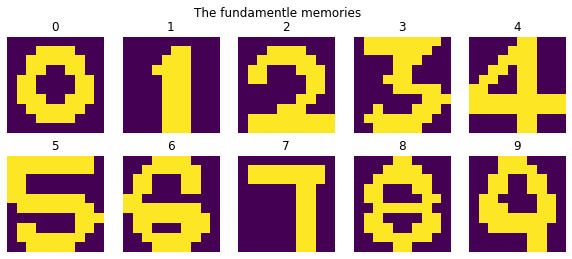

In [4]:
memories = [zero,one,two,three,four,five,six,seven,eight,nine]
fig = plt.figure(figsize = (10,4))
plt.suptitle('The fundamentle memories')
for i,number in enumerate(memories):
    plt.subplot(2,5,i+1)
    plt.imshow(number)
    plt.title('%d'%(i))
    plt.axis('off')

In [5]:
#construct the W matrix.
def Wmatrix(number):
    number = np.array(number)
    number[number <1] = -1
    return np.outer(number,number)

def W_loop(mems):
    if len(mems) ==1:
        return Wmatrix(mems[0])
    else:
        return Wmatrix(mems[0]) + W_loop(mems[1:])
    
memories = [zero,one,two]
# memories = [zero,one,two,three,four,five,six,seven,eight,nine]
w = W_loop(memories)/len(memories)

In [6]:
def generator(number,noise):
    number = np.array(number)
    number[number<1] = -1
    return number + (np.random.random((10,10))*2-1)*noise

In [7]:
def Hopfield(steps,signal):
    nlst = np.arange(100)
    np.random.shuffle(nlst)
    signal = np.array(signal).reshape(100,1)
    for step in range(steps):
        for i in nlst:
            signal[i] = np.sign(np.dot(np.array(w[i]),signal))
    return signal

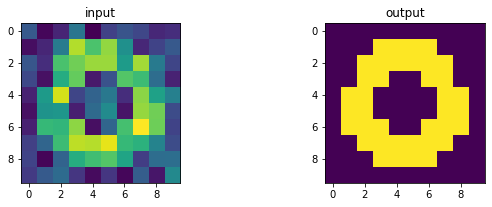

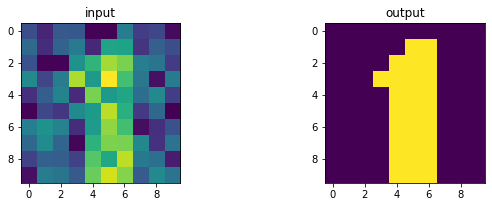

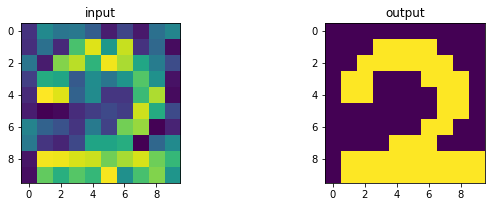

In [8]:
memories = [zero,one,two]
# memories = [zero,one,two,three,four,five,six,seven,eight,nine]
w = W_loop(memories)/len(memories)

for i,memory in enumerate(memories):
    sin = generator(memory,1)
    sout = Hopfield(100,sin)
    fig = plt.figure(figsize = (10,10))
    plt.subplot(len(memories),2,2*i+1)
    plt.imshow(sin)
    plt.title('input')
    plt.subplot(len(memories),2,2*i+2)
    plt.imshow(sout.reshape(10,10))
    plt.title('output')